In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
# Importing the Cleveland data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [68]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [69]:
# Creating a benchmark model

# Importing the logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200,)

In [70]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [71]:
# Separting the data into features and labels
X = df_cleveland.loc[:, df_cleveland.columns != "num"]
y = df_cleveland["num"]

In [72]:
# Importing the cross validation function
from sklearn.model_selection import cross_validate

def cross_validation(model, X, y):
    """
    Performs cross validation and displays evaluation metrics
    param model: A scikit-learn estimator object
    return: Display evaluation metrics
    """
    # Training the model using cross validation
    cv_results = cross_validate(model, X, y, cv=8,
                                scoring=["recall", "precision", "accuracy"],
                                return_train_score=True)
    
    # Displaying the training accuracy metrics
    print("The mean training accuracy is", cv_results["train_accuracy"].mean())
    print("The mean training recall is", cv_results["train_recall"].mean())
    print("The mean training precision is", cv_results["train_precision"].mean())

    print('\n')

    # Displaying the test accuracy metrics
    print("The mean test accuracy is", cv_results["test_accuracy"].mean())
    print("The mean test recall is", cv_results["test_recall"].mean())
    print("The mean test precision is", cv_results["test_precision"].mean())

In [74]:
# Evaluating the benchmark model
cross_validation(lr_classifier, X, y)

The mean training accuracy is 0.8552123552123552
The mean training recall is 0.8175245098039216
The mean training precision is 0.862710321716577


The mean test accuracy is 0.8412162162162162
The mean test recall is 0.7965686274509804
The mean test precision is 0.8657186950046858


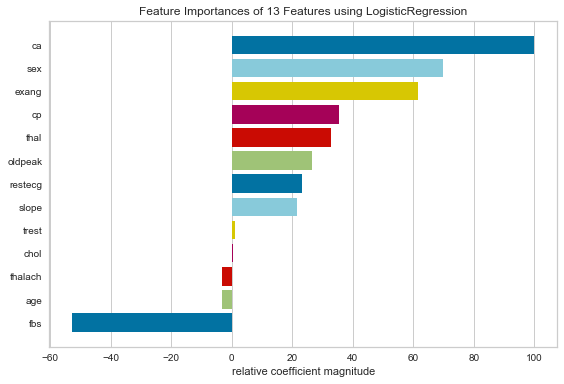

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f81116649d0>,
                   model=None)

In [63]:
# Visualzing the feature importance from the logistic regression model

# Importing the function
from yellowbrick.model_selection.importances import feature_importances

# Creating the graph
feature_importances(lr_classifier, X, y)

In [75]:
# Removing trest and chol to see if it improves test recall

# Getting all the feature column names
important_features = list(X.columns)

# Removing trest and chol since they are close to having zero coefficient value
important_features.remove("trest")
important_features.remove("chol")
important_features.remove("slope")

lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200,)

cross_validation(lr_classifier, X.loc[:, important_features], y)

The mean training accuracy is 0.8566602316602316
The mean training recall is 0.8164740896358543
The mean training precision is 0.8662261802645059


The mean test accuracy is 0.8513513513513513
The mean test recall is 0.8108660130718954
The mean test precision is 0.8691862161531279


In [43]:
# Creating a random forest model

# Importing the logistic regression model
from sklearn.ensemble import RandomForestClassifier

# Creating a logistic regression model
rf_classifier = RandomForestClassifier(n_estimators=150)

In [44]:
# Evaluating the model
cross_validation(rf_classifier, X, y)

The mean training accuracy is 1.0
The mean training recall is 1.0
The mean training precision is 1.0


The mean test accuracy is 0.8141891891891893
The mean test recall is 0.7675653594771241
The mean test precision is 0.8295138888888889


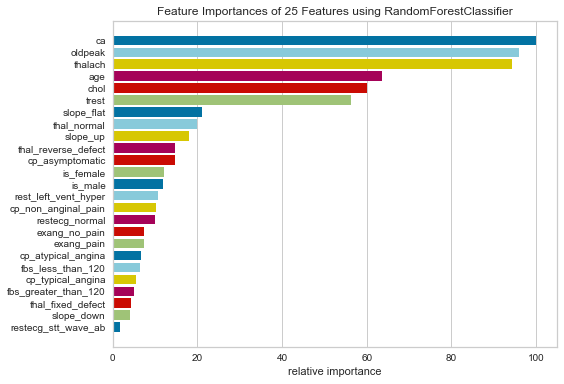

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ef600cf90>,
                   model=None)

In [53]:
# Visualzing the feature importance for the random forest model

# Creating the graph
feature_importances(rf_classifier, X, y)

In [54]:
# Importing the model class
from sklearn.neighbors import KNeighborsClassifier

# Creating the model
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [56]:
cross_validation(knn_classifier, X, y)

The mean training accuracy is 0.7704319815754256
The mean training recall is 0.734963768115942
The mean training precision is 0.7514870014346715


The mean test accuracy is 0.634572072072072
The mean test recall is 0.5868566176470589
The mean test precision is 0.5964573658410732


In [57]:
from sklearn.naive_bayes import GaussianNB

# Creating the model
nb_classifier = GaussianNB()

In [59]:
cross_validation(nb_classifier, X, y)

The mean training accuracy is 0.7881776944383928
The mean training recall is 0.8245041952707857
The mean training precision is 0.7432088755954662


The mean test accuracy is 0.7373310810810811
The mean test recall is 0.785845588235294
The mean test precision is 0.7025130893000475


In [61]:
from sklearn.svm import SVC

# Creating the model
svm_classifier = SVC()

In [62]:
cross_validation(svm_classifier, X, y)

The mean training accuracy is 0.6665097569325573
The mean training recall is 0.44824561403508767
The mean training precision is 0.7064301139123405


The mean test accuracy is 0.652027027027027
The mean test recall is 0.43014705882352944
The mean test precision is 0.6757305194805194


In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier()

In [65]:
cross_validation(gbm_classifier, X, y)

The mean training accuracy is 0.9955650306557531
The mean training recall is 0.9912662090007628
The mean training precision is 0.9989035087719298


The mean test accuracy is 0.7722409909909911
The mean test recall is 0.7238051470588236
The mean test precision is 0.7806372549019608


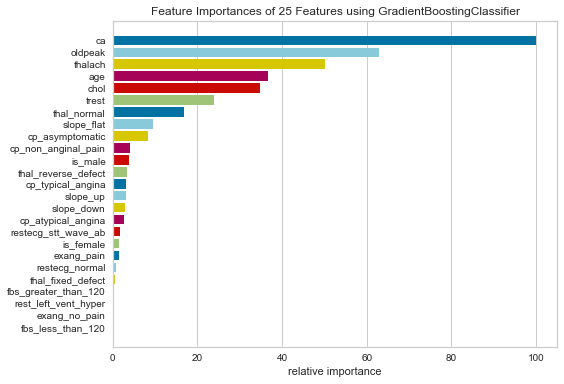

FeatureImportances(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ef3156750>,
                   model=None)

In [66]:
# Visualizing the feature importance
feature_importances(gbm_classifier, X, y)

In [78]:
# Use log to transform the skewed variables to a normal distribution
X["trest"] = np.log(X["trest"])
X["chol"] = np.log(X["chol"])

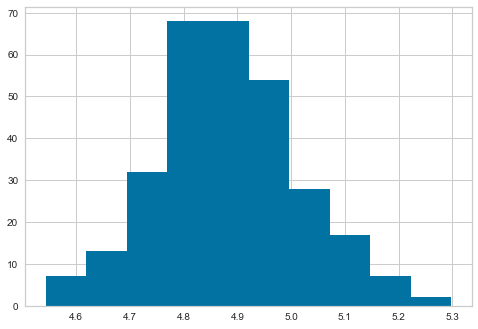

In [79]:
# Plotting the distributions to see if they are now normally distributed
X["trest"].hist()

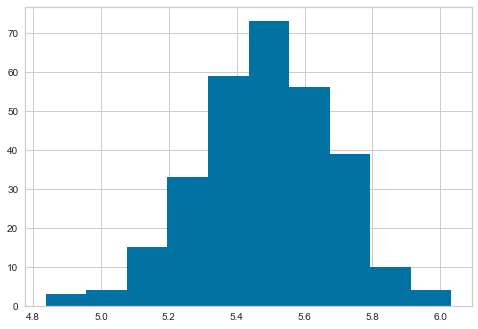

In [80]:
X["chol"].hist()

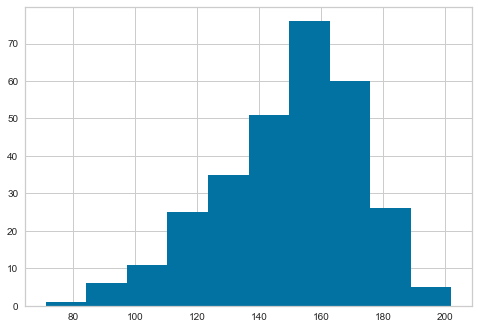

In [81]:
X["thalach"].hist()

In [25]:
# Retraining the logistic regression model with the log transformed data
lr_classifier = LogisticRegression(tol=1e-6, solver='liblinear', max_iter=200)
cross_validation(lr_classifier)

The mean training accuracy is 0.8566602316602316
The mean training recall is 0.8164740896358543
The mean training precision is 0.8662112623927075


The mean test accuracy is 0.8513513513513513
The mean test recall is 0.8035130718954248
The mean test precision is 0.8753618113912232


In [26]:
X["oldpeak"] = np.log(X["oldpeak"])

In [27]:
# Import the data that has the original response labels
df_orig = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data_orig.csv", index_col=0)

In [28]:
df_orig.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [29]:
# Dropping the null values in the dataframe
df_orig.dropna(inplace=True)

In [30]:
# Getting a feature matrix and a vector of labels
X_orig = df_orig.loc[:, df_orig.columns != "num"]
y_orig = df_orig["num"]

In [31]:
from sklearn.model_selection import train_test_split

# Witholding 10% of our data before oversampling
X_train, X_test, y_train, y_test = train_test_split(
     X_orig, y_orig, test_size=0.10)

In [32]:
# Importing the SMOTE class in order to oversample the positive class
from imblearn.over_sampling import SMOTE

# Creating the SMOTE model
smote = SMOTE()

In [33]:
X_orig_over, y_orig_over = smote.fit_resample(X_orig, y_orig)

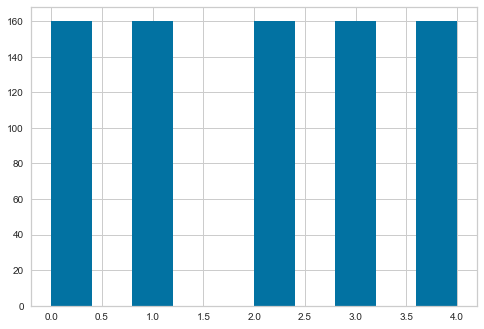

In [34]:
y_orig_over.hist()

In [35]:
# Creating a logistic regression model to be trained on the oversampled data
lr_classifier = LogisticRegression(tol=1e-6, max_iter=20000)

In [36]:
# Evaluating using cross validation
cross_validate(lr_classifier, X_orig_over, y_orig_over)

{'fit_time': array([5.65326381, 5.923949  , 3.64390588, 4.11438227, 5.95393109]),
 'score_time': array([0.00361896, 0.00221014, 0.00167298, 0.00187898, 0.00208688]),
 'test_score': array([0.55   , 0.5625 , 0.60625, 0.675  , 0.66875])}

In [43]:
# Combining the feature matrix and labels
df_over = pd.DataFrame(X_orig_over)
df_over["num"] = y_orig_over

In [44]:
df_over.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [46]:
# Getting only the numerical column so that they can be scaled
num_cols = ["age", "trest", "chol", "thalach", "oldpeak", "ca"]

In [48]:
# Importing the scalar
from sklearn.preprocessing import MinMaxScaler

# Create the scalar object
scaler = MinMaxScaler()

# Scale the numerical columns into a 0 to 1 range
df_over[num_cols]= scaler.fit_transform(df_over[num_cols])

In [55]:
df_over.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,2
2,0.791667,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


In [57]:
X_over = df_over.loc[:, df_over.columns != "num"]
y_over = df_over["num"]

In [61]:
# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-9)


In [62]:
# Evaluating the logistic regression model
cross_validate(lr_classifier, X_over, y_over)

{'fit_time': array([0.09096813, 0.05632806, 0.06690407, 0.05718017, 0.063766  ]),
 'score_time': array([0.00256586, 0.00183582, 0.00208497, 0.00270486, 0.00240898]),
 'test_score': array([0.5125 , 0.5375 , 0.61875, 0.625  , 0.61875])}

In [64]:
# Transforming the response vari|able into a binary column where any value greater than 0 is 1
df_over["num"] = np.where(df_over.num < 1, 0, 1)
X_over = df_over.loc[:, df_over.columns != "num"]
y_over = df_over["num"]

In [72]:
# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-9)
# Evaluating the logistic regression model
cross_validation(lr_classifier, X_over, y_over)

The mean training accuracy is 0.9121428571428571
The mean training recall is 0.9571428571428572
The mean training precision is 0.9346393175255958


The mean test accuracy is 0.89375
The mean test recall is 0.94375
The mean test precision is 0.9263303706758341


In [70]:
# Calculating the average test accuracy
from statistics import mean
print(mean(eval_dict["test_score"]))

0.8775


In [82]:
# Putting the original into a dataframe
df_orig = pd.DataFrame(X)
df_orig["num"] = y

In [83]:
df_orig.head

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,4.976734,5.451038,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,5.075174,5.655992,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,4.787492,5.433722,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,4.867534,5.521461,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,4.867534,5.318120,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [84]:
# Scaling the numerical columns of the original dataframe

# Importing the scalar
from sklearn.preprocessing import MinMaxScaler

# Create the scalar object
scaler = MinMaxScaler()

# Scale the numerical columns into a 0 to 1 range
df_orig[num_cols]= scaler.fit_transform(df_orig[num_cols])

In [85]:
df_orig.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.574074,0.513665,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.704454,0.684916,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1
2,0.791667,1.0,4.0,0.323430,0.499196,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.429444,0.572507,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.429444,0.402604,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


In [87]:
df_orig.shape

(296, 14)

In [89]:
X_orig_over = df_orig.loc[:, df_orig.columns != "num"]
y_orig_over = df_orig["num"]

In [90]:
# Creating a logistic regression model
lr_classifier = LogisticRegression(tol=1e-9)
# Evaluating the logistic regression model
cross_validation(lr_classifier, X_orig_over, y_orig_over)

The mean training accuracy is 0.8450772200772201
The mean training recall is 0.801890756302521
The mean training precision is 0.854549150241257


The mean test accuracy is 0.8344594594594594
The mean test recall is 0.7888071895424836
The mean test precision is 0.8501786612080731


In [98]:
# Importing the dataset again to start clean
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [99]:
# Create the scalar object
scaler = MinMaxScaler()

print(num_cols)

# Scale the numerical columns into a 0 to 1 range
df_cleveland[num_cols]= scaler.fit_transform(df_cleveland[num_cols])

['age', 'trest', 'chol', 'thalach', 'oldpeak', 'ca']


In [100]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.367698,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.549828,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1
2,0.791667,1.0,4.0,0.245283,0.353952,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.426117,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.268041,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


In [101]:
X = df_cleveland.loc[:, df_cleveland.columns != "num"]
y = df_cleveland["num"]

In [102]:
# Witholding 15% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.15)

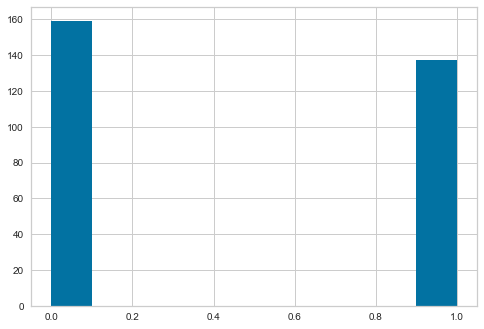

In [103]:
df_cleveland["num"].hist()

In [106]:
# Creating a SMOTE model that oversamples just the minority class (1)
smote = SMOTE()

# Resampling the minority class
X_over, y_over = smote.fit_resample(X_train, y_train)

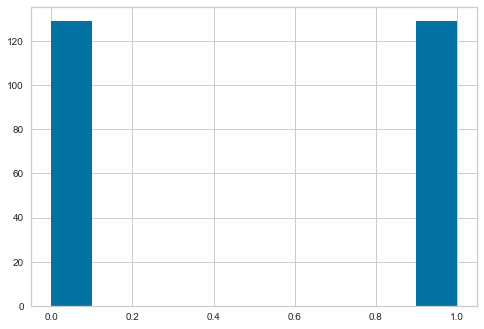

In [107]:
y_over.hist()

In [109]:
# Training a model with the balanced, normalized data
lr_classifier = LogisticRegression(tol=1e-9, solver='liblinear', max_iter=10000)

lr_classifier.fit(X_over, y_over)

LogisticRegression(max_iter=10000, solver='liblinear', tol=1e-09)

In [110]:
# Importing the accuracy metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Getting the predictions for the test set
y_pred = lr_classifier.predict(X_test)

In [111]:
# Evaluating the model using the test set
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8
0.6666666666666666
0.7142857142857143


In [158]:
# Oversampling both classes to have 10,000 observations each
smote_10k = SMOTE({0: 3000, 1: 5000}, k_neighbors=3)

X_10k, y_10k = smote_10k.fit_resample(X_train, y_train)

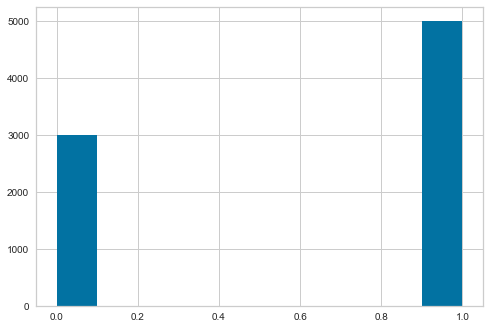

In [159]:
y_10k.hist()

In [160]:
# Training a model with the balanced, normalized data
lr_classifier = LogisticRegression(tol=1e-12, max_iter=20000)

lr_classifier.fit(X_10k, y_10k)

LogisticRegression(max_iter=20000, tol=1e-12)

In [161]:
# Getting predictions using the test set
y_pred = lr_classifier.predict(X_test)

# Evaluating the model using the test set
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.7333333333333333
0.6666666666666666
0.5882352941176471


In [176]:
# Import the data that has the original response labels
df_orig = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data_orig.csv", index_col=0)

In [177]:
# Dropping the null values in the dataframe
df_orig.dropna(inplace=True)

In [178]:
# Create the scalar object
scaler = MinMaxScaler()

print(num_cols)

# Scale the numerical columns into a 0 to 1 range
df_orig[num_cols]= scaler.fit_transform(df_orig[num_cols])

['age', 'trest', 'chol', 'thalach', 'oldpeak', 'ca']


In [179]:
df_orig.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,2
2,0.791667,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0


In [180]:
X = df_orig.loc[:, df_orig.columns != "num"]
y = df_orig["num"]

In [181]:
# Witholding 15% of the data for testing
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.15)

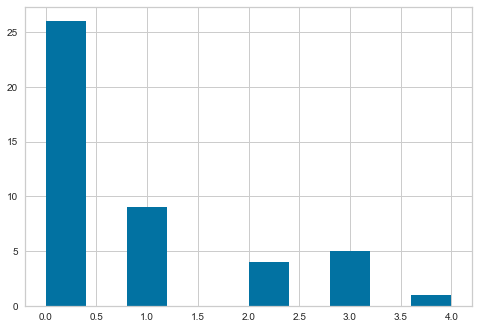

In [182]:
y_test.hist()

In [235]:
# Oversampling the five classes
smote = SMOTE({0: 5000, 1: 1000, 2:1000, 3:1000, 4:1000}, k_neighbors=3)

X_over, y_over = smote.fit_resample(X_train, y_train)

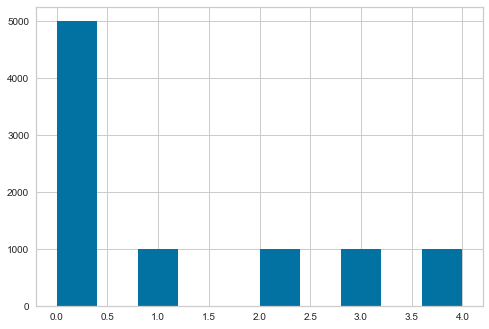

In [236]:
y_over.hist()

In [237]:
# Changing the column to be binary
y_over = np.where(y_over < 1, 0, 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffe489bfcd0>]],
      dtype=object)

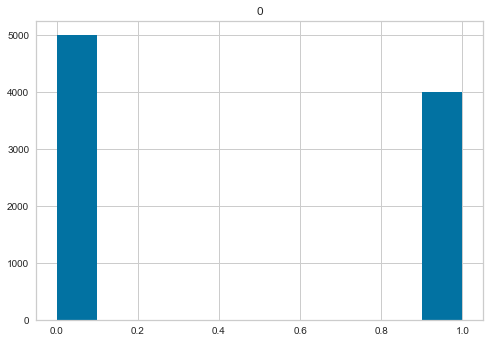

In [238]:
pd.DataFrame(y_over).hist()

In [239]:
# Training a model with the balanced, normalized data
lr_classifier = LogisticRegression(tol=1e-12, max_iter=20000)

lr_classifier.fit(X_over, y_over)

LogisticRegression(max_iter=20000, tol=1e-12)

In [240]:
# Transform y_test to be binary
y_test = np.where(y_test < 1, 0, 1)

In [241]:
# Getting predictions using the test set
y_pred = lr_classifier.predict(X_test)

# Evaluating the model using the test set
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8666666666666667
0.7894736842105263
0.8823529411764706


In [242]:
# Creating a logistic regression model
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_over, y_over)

RandomForestClassifier()

In [243]:
# Getting predictions using the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model using the test set
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.7777777777777778
0.631578947368421
0.8
